# Mal schauen, ob wir genug Daten haben...

In [1]:
import json
from pathlib import Path
from src.corpus import Corpus

%load_ext autoreload
%autoreload 2

In [12]:
source_dir = Path("/home/brunobrocai/Data/MoWiKo/Paper-themKorp")
subcorpora = ['Zeit', 'Spektrum', 'InfoAkt']

corpora = {}
for subcorpus in subcorpora:
    data = []
    corpus = Path(source_dir / subcorpus)

    for file in corpus.glob("*.json"):
        with file.open() as f:
            datum = json.load(f)
        data.append(datum['lemmas'])

    corpora[subcorpus] = Corpus(data)

In [13]:
for corpus in corpora.values():
    corpus.treat_as_one(['künstlich', 'Intelligenz'], 'künstlich_Intelligenz')

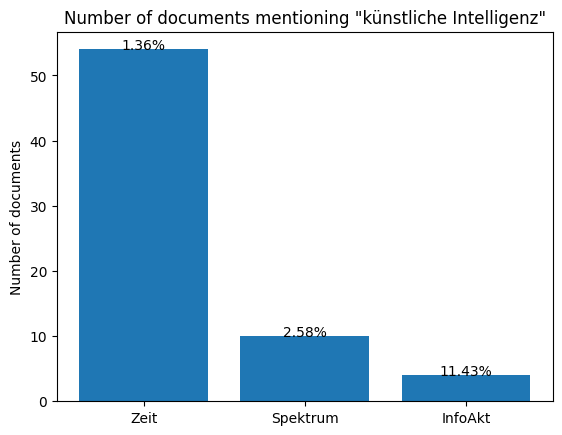

In [16]:
import matplotlib.pyplot as plt

ki_docs = {}
all_docs = {}
for corpus_name, corpus in corpora.items():

    ki_docs[corpus_name] = len([
        doc for doc in corpus.documents
        if 'künstlich_Intelligenz' in set(doc)
    ])
    all_docs[corpus_name] = len(corpus.documents)

# Plot
fig, ax = plt.subplots()
ax.bar(ki_docs.keys(), ki_docs.values())
ax.set_ylabel('Number of documents')
ax.set_title('Number of documents mentioning "künstliche Intelligenz"')

# add percentages
for i, (corpus_name, ki_doc) in enumerate(ki_docs.items()):
    ax.text(i, ki_doc, f"{ki_doc/all_docs[corpus_name]:.2%}", ha='center')